In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/home/harshit/Downloads/project"))

['fundamentals.csv', 'securities.csv', 'prices-split-adjusted.csv', 'prices.csv']


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing 
from sklearn.metrics import classification_report
stock_prices = pd.read_csv(r'/home/harshit/Downloads/project/prices.csv')
symbols = list(set(stock_prices['symbol']))

In [19]:
msft_prices = stock_prices[stock_prices['symbol']== 'MSFT']
msft_prices = msft_prices[['date','open','low','high','close','volume']]
msft_prices.to_csv('msft_prices.csv',sep='\t')
msft_dates = [pd.Timestamp(date) for date in msft_prices['date']]

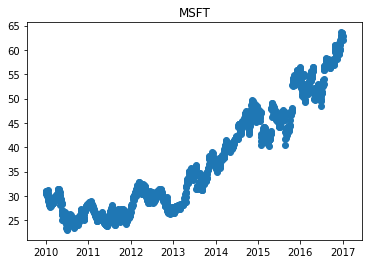

In [20]:
msft_close = np.array(msft_prices['close'],dtype='float')
import matplotlib.pyplot as plt
plt.title('MSFT')
plt.scatter(msft_dates,msft_close)
plt.show()

In [21]:
msft_prices = msft_prices.set_index('date')

In [22]:
def get_x_and_y(price,window_length=7,predict_day_length=1):
    '''get train and test set
    every time get window from price and
    '''
    m = len(price.iloc[0])
    n = len(price) - window_length
    m = window_length * m

    x = np.ones((n,m))
    y = np.ones((n,1))

    for i in range(len(price)-window_length):
        ans = [list(price.iloc[j] for j in range(i,i+window_length))]
        ans = np.array(ans).flatten()
        x[i] = ans
        y[i] = 1 if price.close[i+window_length+predict_day_length-1] - price.close[i+window_length-1] >0 else 0
    return [x,y]


In [23]:
def train_and_test(price,window_length,accurarys,reports):
    x,y = get_x_and_y(msft_prices,window_length=window_length)
    y = y.flatten()
    scaler = preprocessing.StandardScaler()
    scaler.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=233)
    for kernel_arg in ['rbf','poly','linear']:
        clf = svm.SVC(kernel=kernel_arg,max_iter=5000)
        clf.fit(x_train,y_train)
        y_predict = clf.predict(x_test)

        accurary = clf.score(x_test,y_test)
        report = classification_report(y_test,y_predict,target_names = ['drop','up'])
        if window_length in accurarys:
            accurarys[window_length].append(accurary)
            reports[window_length].append(report)
        else: 
            accurarys[window_length] = [accurary]
            reports[window_length] = [report]
        print('The Accurary of %s : %f'%(kernel_arg,clf.score(x_test,y_test)))
        print(report)


In [25]:
window_lengths = [20,70,120,170,220]
accurarys = {}
reports ={}

for l in window_lengths:
    print('window_length:',l)
    train_and_test(msft_prices,l,accurarys,reports)


('window_length:', 20)
The Accurary of rbf : 0.465596
             precision    recall  f1-score   support

       drop       0.47      1.00      0.64       203
         up       0.00      0.00      0.00       233

avg / total       0.22      0.47      0.30       436

The Accurary of poly : 0.534404
             precision    recall  f1-score   support

       drop       0.00      0.00      0.00       203
         up       0.53      1.00      0.70       233

avg / total       0.29      0.53      0.37       436

The Accurary of linear : 0.525229
             precision    recall  f1-score   support

       drop       0.41      0.04      0.08       203
         up       0.53      0.94      0.68       233

avg / total       0.47      0.53      0.40       436

('window_length:', 70)
The Accurary of rbf : 0.486998
             precision    recall  f1-score   support

       drop       0.49      1.00      0.66       206
         up       0.00      0.00      0.00       217

avg / total       0.